#Stub Residuals

In [1]:
import sys
sys.path.append('/Users/demattia/Desktop/Notebooks')
import rootprint
import rootnotes
from array import array
# import LinearFitterHistograms

from ROOT import TFile, TH1F, TCanvas, TLegend, TGraphErrors, gPad, gStyle
import math
from itertools import chain

In [19]:
input_file_name = "/Users/demattia/RemoteProjects/Test/StubDistanceFromGenTrack.root"
input_file = TFile(input_file_name, "READ")

def drawHistograms(name, x_axis_title, x_min = 0., x_max = 0., logY = False, fit = False):
    h = []
    for i in range(6):
        h.append(input_file.FindObjectAny(name+"_"+str(i)))
    # c = TCanvas("c_"+name, "c_"+name, 1200, 1800)
    c = TCanvas("c_"+name, "c_"+name, 600, 900)
    c.Divide(2,3)
    sigma = []
    sigma_err = []
    for i in range(6):
        c.cd(i+1)
        if logY:
            gPad.SetLogy()
        h[i].Draw()
        h[i].SetTitle("")
        h[i].GetXaxis().SetTitle(x_axis_title)
        h[i].GetXaxis().SetTitleOffset(1.2)
        if fit:
            h[i].Fit("gaus")
            sigma.append(h[i].GetFunction("gaus").GetParameter(2))
            sigma_err.append(h[i].GetFunction("gaus").GetParError(2))
        if (x_min != x_max):
            h[i].GetXaxis().SetRangeUser(x_min, x_max)
        h[i].GetYaxis().SetTitle("Entries")
        h[i].GetYaxis().SetTitleOffset(1.5)
    return h, c, sigma, sigma_err

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


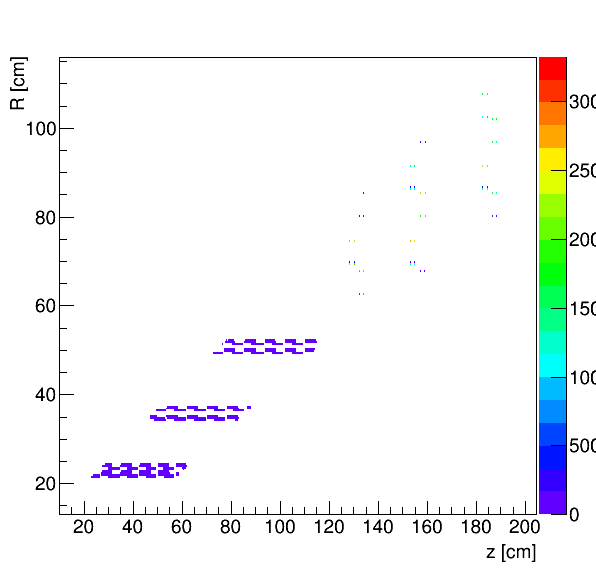

In [20]:
input_file_matrix = TFile("/Users/demattia/RemoteProjects/Test/matrixBuilderHistograms.root", "READ")
h = input_file_matrix.FindObjectAny("RZ_0")
c = TCanvas("c", "c", 600, 600)
gStyle.SetOptStat(0000000)
h.Draw("COLZ")
h.SetTitle("")
h.GetXaxis().SetTitle("z [cm]")
h.GetXaxis().SetTitleOffset(1.2)
h.GetYaxis().SetTitle("R [cm]")
h.GetYaxis().SetTitleOffset(1.2)
c

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c_stubDistanceTransverse


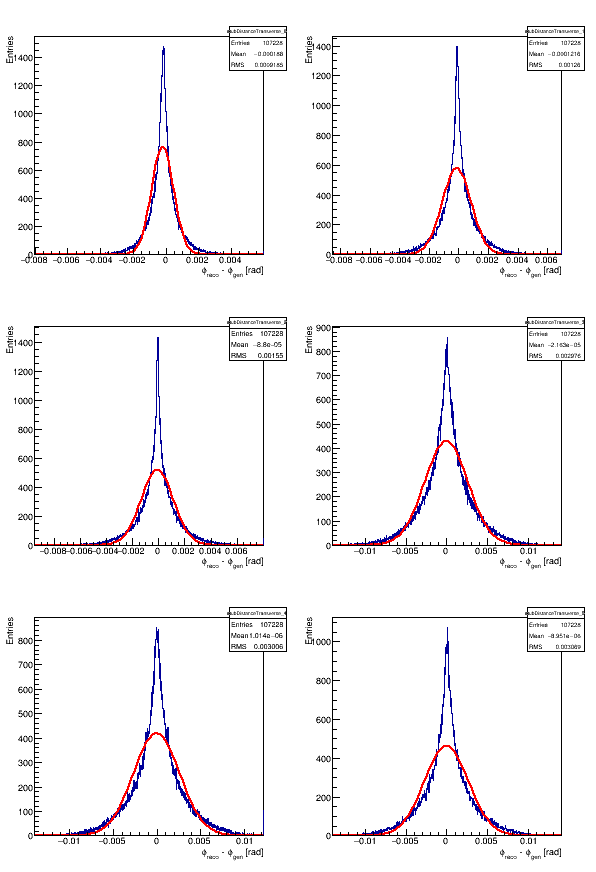

In [21]:
gStyle.SetOptStat()
h, c, s, se = drawHistograms("stubDistanceTransverse", "#phi_{reco} - #phi_{gen} [rad]", -0.014, 0.014, fit = True)
c

In [22]:
for sigma, sigma_err in zip(s, se):
    print sigma, "+/-", sigma_err

0.000675016386423 +/- 3.12366896051e-06
0.000980834445648 +/- 4.59472927151e-06
0.00122900062365 +/- 5.71952325781e-06
0.00265607890676 +/- 1.06408145308e-05
0.0026574833421 +/- 1.10499824322e-05
0.00269744018555 +/- 1.16573371762e-05


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c_stubDistanceLongitudinal


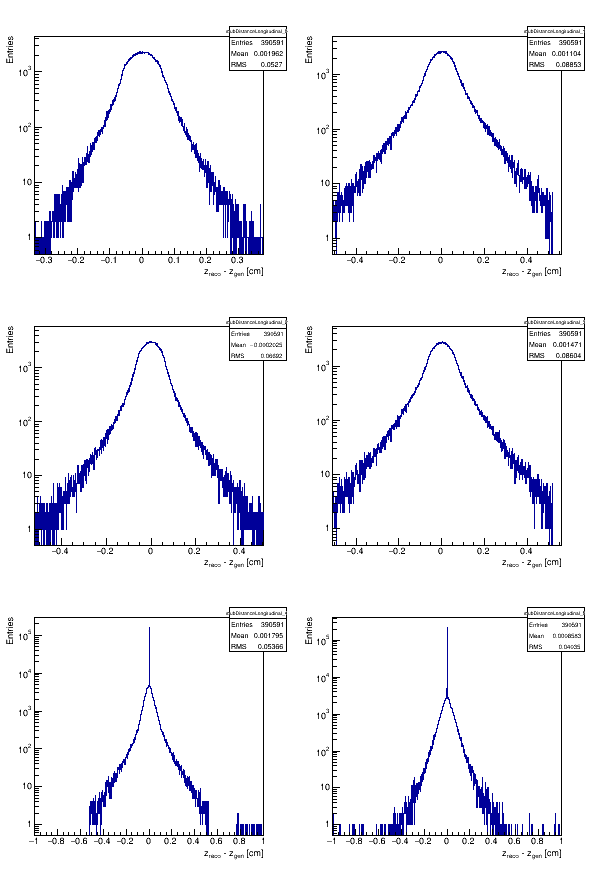

In [12]:
h, c, s, se = drawHistograms("stubDistanceLongitudinal", "z_{reco} - z_{gen} [cm]", logY = True)

c

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c_stubDistanceLongitudinalR


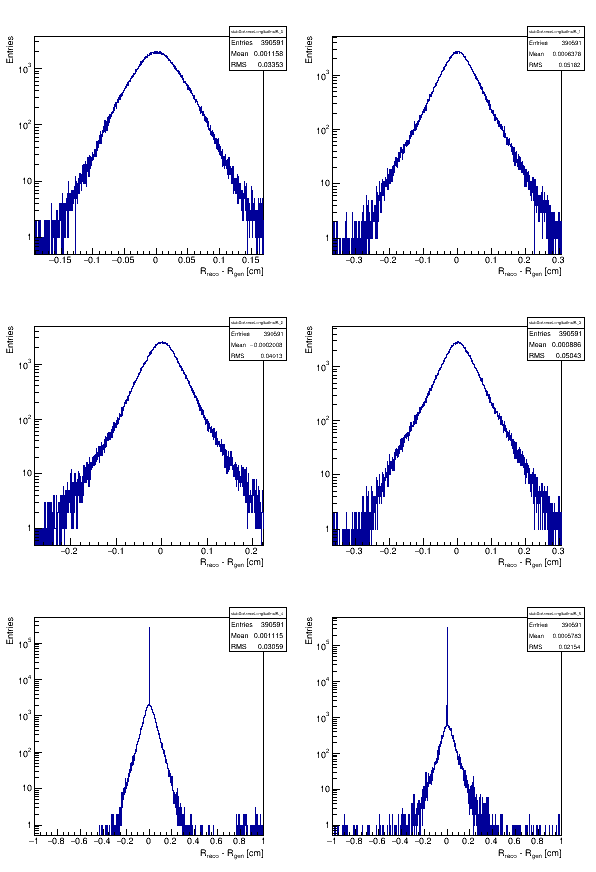

In [13]:
h, c, s, se = drawHistograms("stubDistanceLongitudinalR", "R_{reco} - R_{gen} [cm]", logY = True)

c